In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [55]:
water = pd.read_csv('drinking_water_potability.csv')
water.head()
water = water.dropna()
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [56]:
np.random.seed(2)
# 80% to be training
train = water.sample(round(water.shape[0]*.8))
# drop the train data from the test df
test = water.drop(train.index)

In [75]:
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    return accuracy,cm

Optimization terminated successfully.
         Current function value: 0.671184
         Iterations 4
Classification accuracy = 60.4%


0.6041770263550472

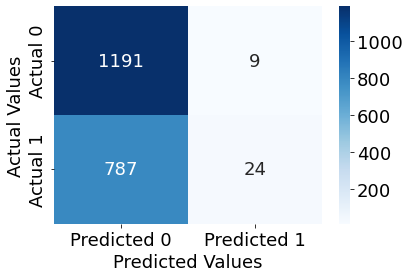

In [76]:
logit_model = sm.logit(formula = 'Potability~Hardness*Solids+Chloramines*Sulfate+\
                Organic_carbon*Sulfate+Conductivity*Hardness+Chloramines*Organic_carbon', data = water).fit() #Developing logistic regression model
logit_model.summary()
accuracy,cm = confusion_matrix_test(water,water.Potability,logit_model,.5)
accuracy

In [29]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Accuracy'].argmax()]
    return best_model

In [37]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Accuracy", "model"])

for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)
models_best

,Accuracy,model
1,0.621891,<statsmodels.regression.linear_model.Regressio...
2,0.624378,<statsmodels.regression.linear_model.Regressio...
3,0.626866,<statsmodels.regression.linear_model.Regressio...
4,0.626866,<statsmodels.regression.linear_model.Regressio...
5,0.626866,<statsmodels.regression.linear_model.Regressio...
6,0.626866,<statsmodels.regression.linear_model.Regressio...
7,0.626866,<statsmodels.regression.linear_model.Regressio...
8,0.624378,<statsmodels.regression.linear_model.Regressio...
9,0.624378,<statsmodels.regression.linear_model.Regressio...


In [87]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    
    accuracy = models_best.apply(lambda row: confusion_matrix_test(test,test.Potability,row[1],cutoff=0.6)[0], axis=1)
    plt.plot(models_best["Accuracy"])
    plt.plot(1+accuracy.argmax(), accuracy.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('Accuracy')

In [77]:
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('Potability~' + '+'.join(predictor_subset),data = train).fit()
    accuracy,cm = confusion_matrix_test(test,test.Potability,model,cutoff=0.5)
    return {"model":model, "Accuracy":accuracy}

In [50]:
train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,ph_ph_Organic_carbon_Organic_carbon_Trihalomethanes,ph_ph_Organic_carbon_Organic_carbon_Turbidity,ph_ph_Organic_carbon_Trihalomethanes_Turbidity,ph_ph_Trihalomethanes_ph_Turbidity,ph_ph_Trihalomethanes_Hardness_Solids,ph_ph_Trihalomethanes_Hardness_Chloramines,ph_ph_Trihalomethanes_Hardness_Sulfate,ph_ph_Trihalomethanes_Hardness_Conductivity,ph_ph_Trihalomethanes_Hardness_Organic_carbon,ph_ph_Trihalomethanes_Hardness_Trihalomethanes
773,6.848330,195.451482,15908.64209,6.241349,319.264722,404.204859,18.937338,75.392795,3.732202,1,...,1.268052e+06,62772.914607,249909.759954,90375.133222,1.099439e+10,4.313368e+06,2.206424e+08,2.793442e+08,1.308751e+07,5.210363e+07
1200,8.016279,211.029304,14034.48580,9.797000,389.338796,491.079082,14.512991,35.565966,4.308223,1,...,4.813867e+05,58311.965070,142901.031646,78931.665418,6.768923e+09,4.725156e+06,1.877806e+08,2.368506e+08,6.999709e+06,1.715369e+07
1086,7.845880,193.785000,13769.86024,9.007161,343.620823,510.305603,13.767802,99.175595,3.667154,1,...,1.157224e+06,42789.941792,308234.967144,175654.369833,1.629063e+10,1.065605e+07,4.065255e+08,6.037243e+08,1.628819e+07,1.173311e+08
3057,7.985406,200.134697,17583.08033,6.771729,296.569823,377.584203,10.289288,66.890747,4.752452,0,...,4.515759e+05,32083.550170,208575.424549,161873.154819,1.500989e+10,5.780721e+06,2.531684e+08,3.223267e+08,8.783504e+06,5.710163e+07
2965,9.459931,222.894659,14450.17575,6.790914,293.746321,433.145005,9.069161,67.906813,3.322890,0,...,4.998314e+05,24458.290121,183135.401299,191026.278935,1.957321e+10,9.198502e+06,3.978885e+08,5.867083e+08,1.228446e+07,9.198187e+07


In [57]:
from sklearn.metrics import r2_score
import itertools
X = train.loc[:, train.columns!='Potability']
train2 = train.copy()
test2 = test.copy()
#Creating a dataframe with all the predictors
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train.loc[:, train.columns!='Potability']
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)]

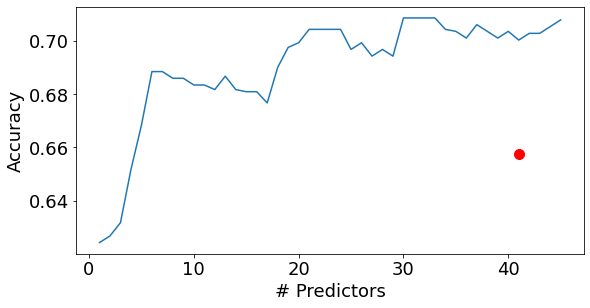

In [58]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Accuracy'].argmax()]

    # Return the best model, along with some other useful information about the model
    return best_model

def forward_selection():
    models_best = pd.DataFrame(columns=["Accuracy", "model"])

    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])
    return models_best

models_best = forward_selection()
best_sub_plots()


In [68]:
models_best.loc[30,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Potability   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.097
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.06e-17
Time:                        21:42:24   Log-Likelihood:                -1066.6
No. Observations:                1609   AIC:                             2195.
Df Residuals:                    1578   BIC:                             2362.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.4127      0.978      1.444      0.149      -0.506       3.331
Solids_Conductivity            -1.203e-08   1.58e-08     -0.761      0.447   -4.31e-08     1.9e-08
ph_Chloramines                     0.0270      0.005      5.950      0.000       0.018       0.036
Chloramines                       -0.1956      0.082     -2.373      0.018      -0.357      -0.034
ph_Sulfate                        -0.0009      0.000     -5.767      0.000      -0.001      -0.001
Chloramines_Sulfate                0.0003      0.000      2.233      0.026    3.48e-05       0.001
Organic_carbon_Trihalomethanes  9.583e-06      0.000      0.041      0.967      -0.000       0.000
ph_Hardness                       -0.0002      0.000     -1.142      0.254      -0.001       0.000
Hardness                           0.0017      0.003      0.543      0.587      -0.004       0.008
ph_Organic_carbon              -2.034e-05      0.002     -0.009      0.993      -0.005       0.005
Solids_Chloramines             -1.524e-06   8.77e-07     -1.737      0.083   -3.24e-06    1.97e-07
Solids_Sulfate                 -8.284e-08   2.76e-08     -3.001      0.003   -1.37e-07   -2.87e-08
Hardness_Trihalomethanes        7.186e-07   2.46e-05      0.029      0.977   -4.75e-05     4.9e-05
Trihalomethanes                   -0.0038      0.008     -0.489      0.625      -0.019       0.012
Turbidity                         -0.0595      0.134     -0.444      0.657      -0.322       0.203
Hardness_Turbidity                 0.0003      0.000      0.697      0.486      -0.001       0.001
Sulfate_Conductivity            4.046e-06   1.89e-06      2.136      0.033    3.31e-07    7.76e-06
ph_Solids                        3.29e-06    7.8e-07      4.220      0.000    1.76e-06    4.82e-06
Solids_Trihalomethanes          9.943e-08   9.06e-08      1.097      0.273   -7.84e-08    2.77e-07
Chloramines_Trihalomethanes        0.0002      0.000      0.387      0.698      -0.001       0.001
Hardness_Solids                -5.371e-08   4.02e-08     -1.336      0.182   -1.33e-07    2.51e-08
Organic_carbon                    -0.1010      0.042     -2.402      0.016      -0.184      -0.019
Solids_Turbidity               -3.772e-07   1.81e-06     -0.208      0.835   -3.93e-06    3.17e-06
ph_Trihalomethanes              1.587e-05      0.001      0.031      0.975      -0.001       0.001
ph_Turbidity                       0.0035      0.010      0.352      0.725      -0.016       0.023
Organic_carbon_Turbidity          -0.0012      0.004     -0.264      0.791      -0.010       0.008
Solids_Organic_carbon           3.542e-07   4.13e-07      0.858      0.391   -4.55e-07    1.16e-06
ph                                 0.0682      0.105      0.646      0.518      -0.139       0.275
Solids        

Classification accuracy = 70.9%


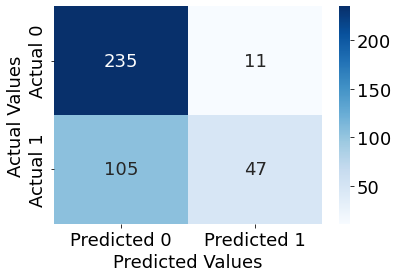

In [84]:
accuracy,cm = confusion_matrix_test(test,test.Potability,models_best.loc[30,'model'],cutoff=0.5)

In [85]:
cm[1,1]/(cm[1,1]+cm[1,0])

0.3092105263157895